In [65]:
# Import required libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

print("Imported successfully")


Imported successfully


In [66]:
# Generate synthetic data
def generate_nonlinear_data(n_samples=1000):
    X = np.random.uniform(0, 10, (n_samples, 1))
    noise = np.random.normal(0, 1, n_samples)
    y = 0.5 * X.ravel()**2 + 2 * X.ravel() + 1 + noise
    return X, y

# Generate data
X, y = generate_nonlinear_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Gen successfully")

Gen successfully


In [67]:
# Dictionary to store models
models = {
    'Simple Linear Regression': LinearRegression(),
    'Ridge Regression (L2)': Ridge(alpha=1.0),
    'Lasso Regression (L1)': Lasso(alpha=1.0),
    'Elastic Net': ElasticNet(alpha=1.0, l1_ratio=0.5),
    'Polynomial Regression (degree=2)': Pipeline([
        ('poly', PolynomialFeatures(degree=2)),
        ('linear', LinearRegression())
    ])
}

# Lists to store results
model_names = []
mse_train_list = []
mse_test_list = []
r2_train_list = []
r2_test_list = []
coefficients_list = []

print("Initialized successfully")


Initialized successfully


In [68]:
# Train and evaluate each model
for name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate metrics
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    # Store results
    model_names.append(name)
    mse_train_list.append(mse_train)
    mse_test_list.append(mse_test)
    r2_train_list.append(r2_train)
    r2_test_list.append(r2_test)
    
    # Store coefficients (handling polynomial features separately)
    if name == 'Polynomial Regression (degree=2)':
        coef = model.named_steps['linear'].coef_
    else:
        coef = model.coef_
    coefficients_list.append(coef)

In [69]:
# Create results DataFrame once
results_df = pd.DataFrame({
    'Model': model_names,
    'MSE (Train)': [f"{x:.4f}" for x in mse_train_list],
    'MSE (Test)': [f"{x:.4f}" for x in mse_test_list],
    'R² (Train)': [f"{x:.4f}" for x in r2_train_list],
    'R² (Test)': [f"{x:.4f}" for x in r2_test_list]
})

In [70]:
results_df

,Model,MSE (Train),MSE (Test),R² (Train),R² (Test)
0,Simple Linear Regression,14.3960,15.9826,0.9667,0.9599
1,Ridge Regression (L2),14.3960,15.9792,0.9667,0.9599
2,Lasso Regression (L1),14.5128,15.7106,0.9664,0.9606
3,Elastic Net,16.0570,16.1538,0.9628,0.9595
4,Polynomial Regression (degree=2),1.0019,0.8627,0.9977,0.9978


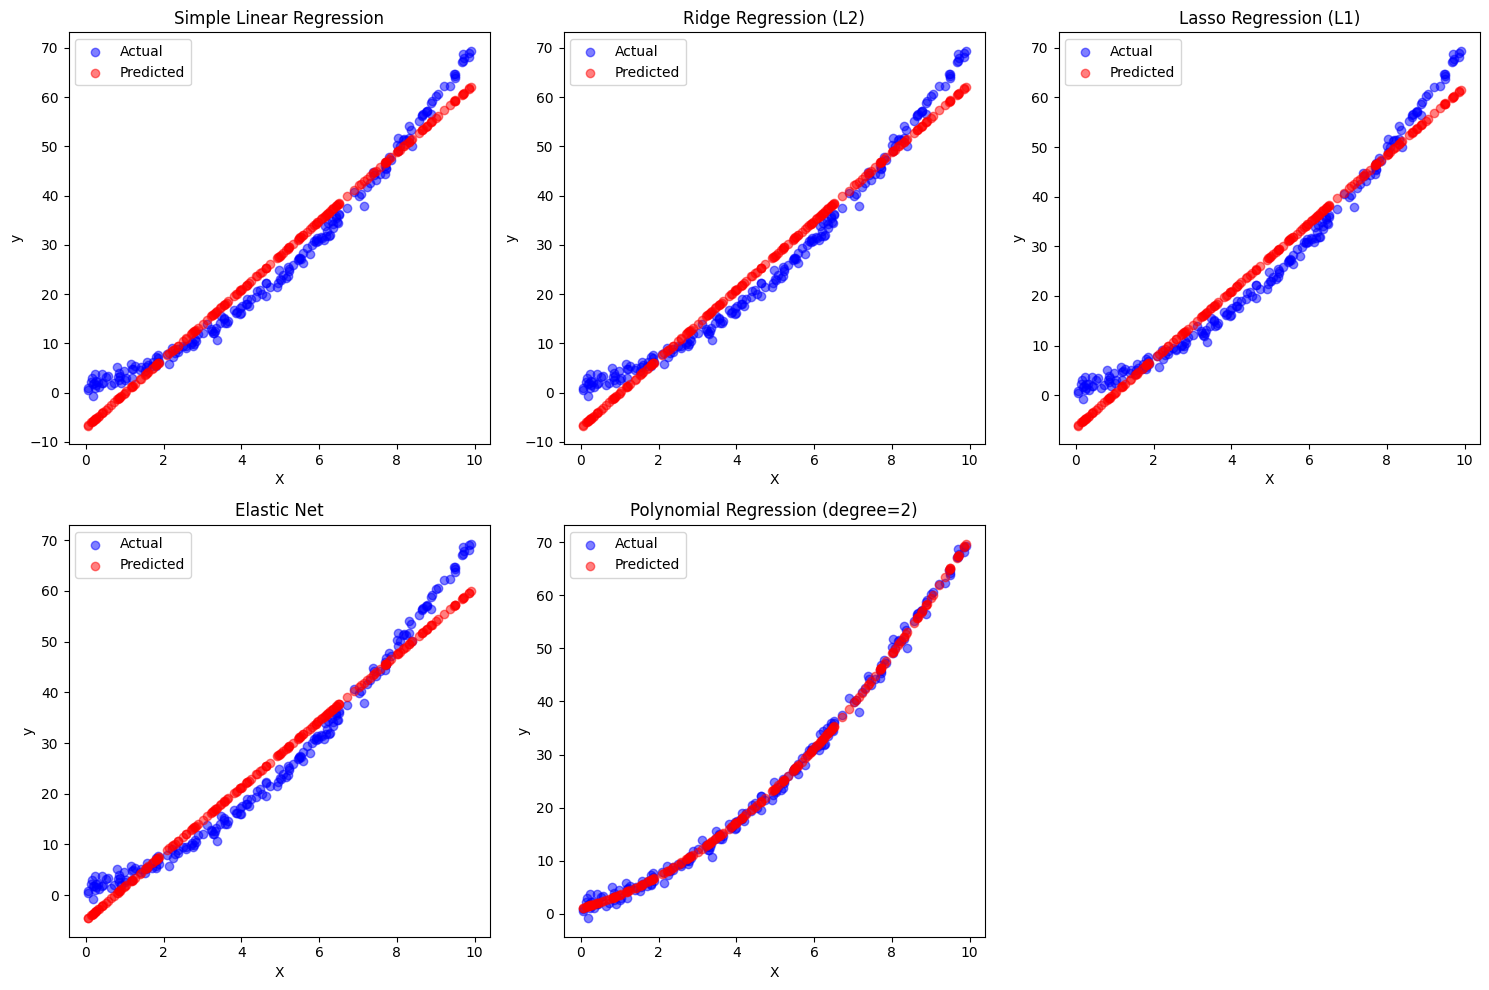

In [71]:
# Visualization of predictions
plt.figure(figsize=(15, 10))
for i, (name, model) in enumerate(models.items(), 1):
    plt.subplot(2, 3, i)
    plt.scatter(X_test, y_test, color='blue', alpha=0.5, label='Actual')
    plt.scatter(X_test, model.predict(X_test), color='red', alpha=0.5, label='Predicted')
    plt.title(name)
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
plt.tight_layout()
plt.show()